In [93]:
import pandas as pd
import numpy as np

In [94]:
df=pd.read_csv("cities.csv")

In [95]:
df.head()

,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,...,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,ozone,precipAccumulation,city,demand
0,2018-07-02 05:00:00,Clear,clear-night,0.0,0.0,89.56,91.71,65.31,0.45,1011.9,...,12.40,164.0,0.06,0.0,9.617,NaN,NaN,NaN,dallas,13839.70
1,2018-07-02 06:00:00,Clear,clear-night,0.0,0.0,88.35,92.26,68.29,0.52,1012.7,...,9.94,179.0,0.04,0.0,9.817,NaN,NaN,NaN,dallas,14067.03
2,2018-07-02 07:00:00,Clear,clear-night,0.0,0.0,87.05,91.45,69.26,0.56,1012.8,...,10.31,186.0,0.04,0.0,9.510,NaN,NaN,NaN,dallas,14323.09
3,2018-07-02 08:00:00,Clear,clear-night,0.0,0.0,86.04,90.51,69.61,0.58,1012.7,...,8.47,189.0,0.18,0.0,9.617,NaN,NaN,NaN,dallas,14652.59
4,2018-07-02 09:00:00,Clear,clear-night,0.0,0.0,84.80,89.74,70.68,0.63,1012.9,...,5.61,193.0,0.15,0.0,9.617,NaN,NaN,NaN,dallas,15582.09


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167264 entries, 0 to 167263
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 167264 non-null  object 
 1   summary              166987 non-null  object 
 2   icon                 166985 non-null  object 
 3   precipIntensity      167034 non-null  float64
 4   precipProbability    167034 non-null  float64
 5   temperature          167254 non-null  float64
 6   apparentTemperature  167254 non-null  float64
 7   dewPoint             167264 non-null  float64
 8   humidity             167254 non-null  float64
 9   pressure             167214 non-null  float64
 10  windSpeed            167211 non-null  float64
 11  windGust             167061 non-null  float64
 12  windBearing          167209 non-null  float64
 13  cloudCover           167024 non-null  float64
 14  uvIndex              167089 non-null  float64
 15  visibility       

In [97]:
missing_summary = df.isnull().sum().sort_values(ascending=False)
print(missing_summary)

precipAccumulation     165161
precipType              87919
demand                  36608
ozone                   20409
icon                      279
summary                   277
cloudCover                240
precipIntensity           230
precipProbability         230
windGust                  203
uvIndex                   175
visibility                172
windBearing                55
windSpeed                  53
pressure                   50
humidity                   10
apparentTemperature        10
temperature                10
time                        0
dewPoint                    0
city                        0
dtype: int64


In [98]:

# Step 1: Drop column with too many missing values
df.drop(columns=['precipAccumulation'], inplace=True)

# Step 2: Convert 'time' to datetime and extract time-based features
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour
df['dayofweek'] = df['time'].dt.dayofweek
df['month'] = df['time'].dt.month
df['season'] = df['month'] % 12 // 3 + 1  # Winter:1, Spring:2, Summer:3, Fall:4

# Step 3: Drop rows where 'demand' is missing
df = df.dropna(subset=['demand'])

# Step 4: Handle 'precipType' (impute missing as 'no_precipitation')
df['precipType'] = df['precipType'].fillna('no_precipitation')

# Step 5: Impute categorical columns 'summary' and 'icon' with the mode
df['summary'] = df['summary'].fillna(df['summary'].mode()[0])
df['icon'] = df['icon'].fillna(df['icon'].mode()[0])

# Step 6: Impute 'ozone' using seasonal average within each city
df['ozone'] = df.groupby(['city', 'season'])['ozone'].transform(lambda x: x.fillna(x.mean()))

# Alternatively, you could use linear interpolation for ozone:
# df['ozone'] = df['ozone'].interpolate(method='linear')

# Step 7: Impute continuous weather variables via linear interpolation
weather_cols = [
    'cloudCover', 'precipIntensity', 'precipProbability', 'windGust',
    'uvIndex', 'visibility', 'windBearing', 'windSpeed', 'pressure',
    'humidity', 'apparentTemperature', 'temperature'
]

# Ensure sorting by 'time' before interpolation
df.sort_values(by='time', inplace=True)

for col in weather_cols:
    df[col] = df[col].interpolate(method='linear', limit_direction='both')

# Step 8: Final sanity check to ensure no missing values
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Missing values after preprocessing:\n", missing_summary)

# Step 9: Optional: Set 'time' as the index (for time-series operations)
# df.set_index('time', inplace=True)

# Optionally, save the cleaned dataset to a new file
# df.to_csv("cleaned_dataset.csv", index=False)


Missing values after preprocessing:
 time                   0
summary                0
icon                   0
precipIntensity        0
precipProbability      0
temperature            0
apparentTemperature    0
dewPoint               0
humidity               0
pressure               0
windSpeed              0
windGust               0
windBearing            0
cloudCover             0
uvIndex                0
visibility             0
precipType             0
ozone                  0
city                   0
demand                 0
hour                   0
dayofweek              0
month                  0
season                 0
dtype: int64


In [99]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130656 entries, 117543 to 150642
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   time                 130656 non-null  datetime64[ns]
 1   summary              130656 non-null  object        
 2   icon                 130656 non-null  object        
 3   precipIntensity      130656 non-null  float64       
 4   precipProbability    130656 non-null  float64       
 5   temperature          130656 non-null  float64       
 6   apparentTemperature  130656 non-null  float64       
 7   dewPoint             130656 non-null  float64       
 8   humidity             130656 non-null  float64       
 9   pressure             130656 non-null  float64       
 10  windSpeed            130656 non-null  float64       
 11  windGust             130656 non-null  float64       
 12  windBearing          130656 non-null  float64       
 13  cloudCover    

Feature Enginnerring

In [100]:
from sklearn.preprocessing import StandardScaler

# Define the continuous columns to scale, excluding non-numerical columns
continuous_cols = [
    'precipIntensity', 'precipProbability', 'temperature', 'apparentTemperature',
    'dewPoint', 'humidity', 'pressure', 'windSpeed', 'windGust', 'windBearing',
    'cloudCover', 'uvIndex', 'visibility', 'ozone',
    'hour', 'dayofweek', 'month', 'season'  # Time-related features included as continuous
]

# Initialize the StandardScaler to scale the continuous features
scaler = StandardScaler()

# Copy the continuous columns to avoid any SettingWithCopyWarning
df_scaled_features = df[continuous_cols].copy()

# Apply scaling to the continuous features
df_scaled_features = scaler.fit_transform(df_scaled_features)

# Convert the scaled numpy array back to a DataFrame, preserving the original column names
df_scaled_features = pd.DataFrame(df_scaled_features, columns=continuous_cols, index=df.index)

# Replace the original continuous columns with the scaled versions in the main DataFrame
df[continuous_cols] = df_scaled_features

# Display the first 5 rows of the scaled continuous features
print("DataFrame after scaling continuous features (first 5 rows, selected columns):")
print(df[continuous_cols].head())

# Sanity check: Check mean and std deviation of scaled columns (should be approx 0 and 1)
print("\nMean of scaled columns:")
print(df[continuous_cols].mean())
print("\nStandard Deviation of scaled columns:")
print(df[continuous_cols].std())


DataFrame after scaling continuous features (first 5 rows, selected columns):
        precipIntensity  precipProbability  temperature  apparentTemperature  \
117543        -0.191771          -0.364451    -0.065032            -0.062005   
134117        -0.191771          -0.364451     0.185665             0.153249   
34165         -0.191771          -0.364451     0.124791             0.100981   
34166         -0.191771          -0.364451     0.086826             0.068384   
117544        -0.191771          -0.364451    -0.064378            -0.061443   

        dewPoint  humidity  pressure  windSpeed  windGust  windBearing  \
117543  0.292953  0.586290 -0.115803  -0.877789 -1.059149     0.461076   
134117  0.145586 -0.221889 -0.543114  -0.853027 -0.719318    -0.412859   
34165   0.487778  0.586290 -0.329459  -0.632921 -0.927649     0.083695   
34166   0.463425  0.636801 -0.378764  -0.561387 -0.889233     0.004246   
117544  0.294202  0.586290 -0.181543  -0.525620 -0.870025    -0.184444 

In [101]:
# Step 1: Extract date from 'time' column
df['date'] = df['time'].dt.date

# Step 2: Perform daily aggregation
daily_df = df.groupby(['city', 'date']).agg({
    'temperature': 'mean',        # Calculate mean for temperature
    'humidity': 'mean',           # Calculate mean for humidity
    'demand': 'sum',              # Calculate sum for demand (since it's the total demand for the day)
    'precipIntensity': 'mean',    # Mean for precip intensity
    'precipProbability': 'mean',  # Mean for precip probability
    'windSpeed': 'mean',          # Mean for wind speed
    'pressure': 'mean',           # Mean for pressure
    'windGust': 'mean',           # Mean for wind gust
    'cloudCover': 'mean',         # Mean for cloud cover
    'uvIndex': 'mean',            # Mean for UV index
    'visibility': 'mean',         # Mean for visibility
    'ozone': 'mean',              # Mean for ozone
}).reset_index()

print("Daily Aggregation (first 5 rows):")
print(daily_df.head())


Daily Aggregation (first 5 rows):
     city        date  temperature  humidity     demand  precipIntensity  \
0  dallas  2018-07-02     1.732155 -0.817389  377216.43        -0.191771   
1  dallas  2018-07-03     1.825071 -1.133195  454936.97        -0.186647   
2  dallas  2018-07-04     1.488572 -0.541793  398052.18        -0.191771   
3  dallas  2018-07-05     1.360332 -0.287132  411305.37        -0.191771   
4  dallas  2018-07-06     1.505208 -0.354481  407710.54        -0.139004   

   precipProbability  windSpeed  pressure  windGust  cloudCover   uvIndex  \
0          -0.364451   0.310637 -0.502459 -0.397762   -0.976293  0.958668   
1          -0.348045   0.116470 -0.648572 -0.525208   -1.092856  0.687735   
2          -0.364451   0.411319 -0.298643 -0.357693   -0.315788  0.348129   
3          -0.364451  -0.021670  0.611446 -0.599392   -0.403464  0.491121   
4          -0.167580  -0.054915  0.735393 -0.565224   -0.108010  0.312381   

   visibility     ozone  
0   -0.192587  0.043

In [102]:
# Step 1: Extract the week from the 'time' column
df['week'] = df['time'].dt.isocalendar().week

# Step 2: Perform weekly aggregation
weekly_df = df.groupby(['city', 'week']).agg({
    'temperature': 'mean',        # Mean temperature for the week
    'humidity': 'mean',           # Mean humidity for the week
    'demand': 'sum',              # Total demand for the week
    'precipIntensity': 'mean',    # Mean precip intensity for the week
    'precipProbability': 'mean',  # Mean precip probability for the week
    'windSpeed': 'mean',          # Mean wind speed for the week
    'pressure': 'mean',           # Mean pressure for the week
    'windGust': 'mean',           # Mean wind gust for the week
    'cloudCover': 'mean',         # Mean cloud cover for the week
    'uvIndex': 'mean',            # Mean UV index for the week
    'visibility': 'mean',         # Mean visibility for the week
    'ozone': 'mean',              # Mean ozone for the week
}).reset_index()

print("Weekly Aggregation (first 5 rows):")
print(weekly_df.head())


Weekly Aggregation (first 5 rows):
     city  week  temperature  humidity      demand  precipIntensity  \
0  dallas     1    -1.042029 -0.005563  4405969.50         0.053883   
1  dallas     2    -0.721406 -0.136802  4209462.48         0.110202   
2  dallas     3    -0.809760  0.521497  4278663.69         0.042779   
3  dallas     4    -1.005638 -0.155760  4765368.82        -0.104571   
4  dallas     5    -0.848296  0.129585  4246520.84        -0.086576   

   precipProbability  windSpeed  pressure  windGust  cloudCover   uvIndex  \
0           0.187101   0.153154  0.241120  0.387094    0.083212 -0.329806   
1           0.145109   0.568431  0.782400  0.858715    0.016812 -0.301718   
2           0.116204   0.474108  1.046729  0.733635    0.663739 -0.294058   
3          -0.014763   0.235730  0.823098  0.472782   -0.085020 -0.317192   
4          -0.077543   0.109141  0.409188  0.281912    0.329509 -0.278737   

   visibility     ozone  
0   -0.076813 -0.667869  
1    0.101584 -0.815436

--- 5.1. Visual Inspection for Anomalies ---


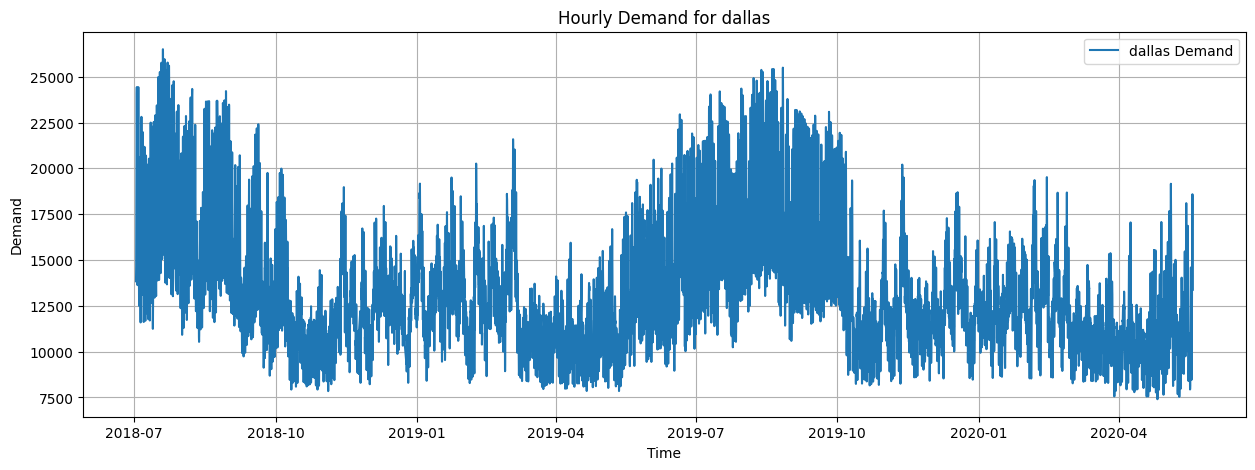

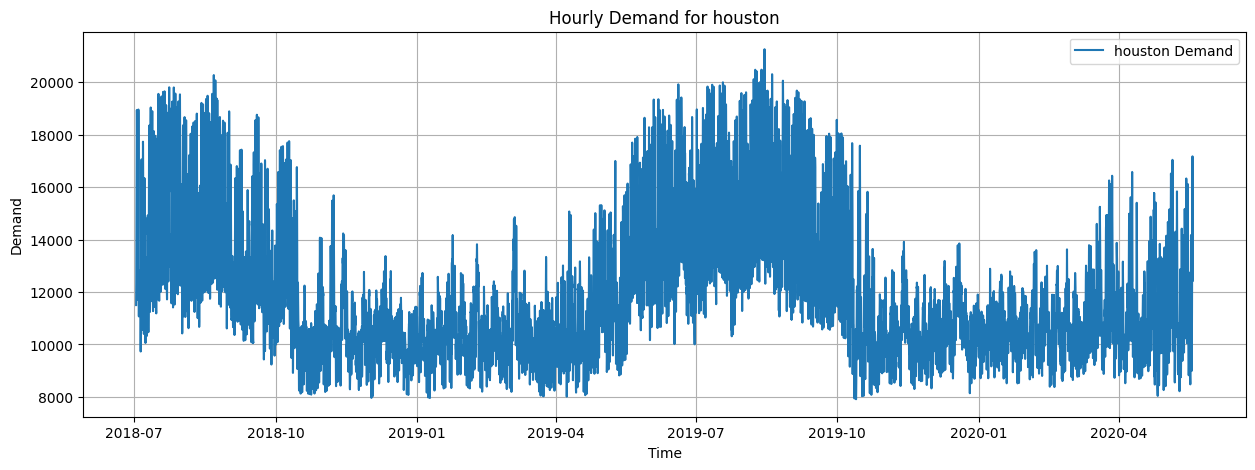

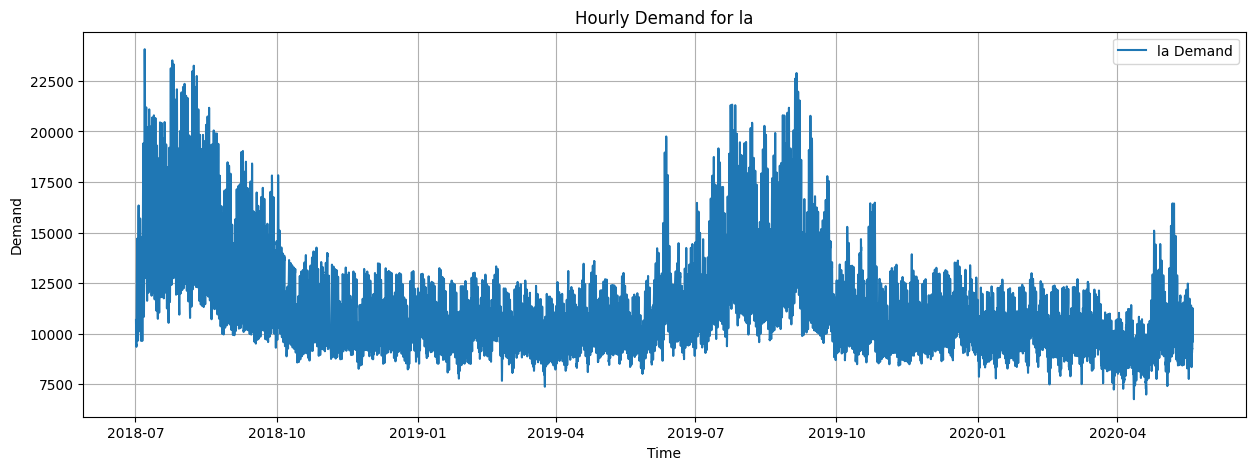

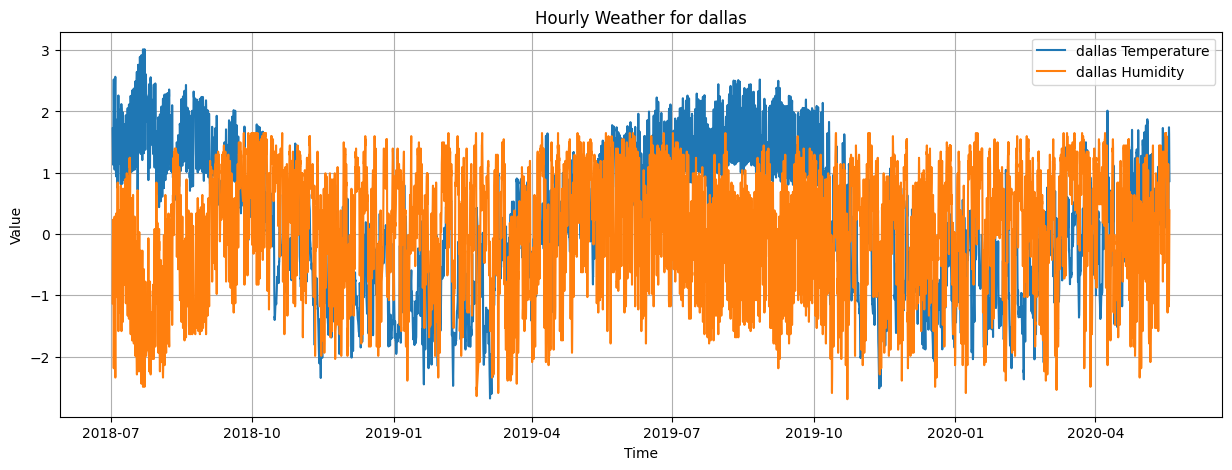

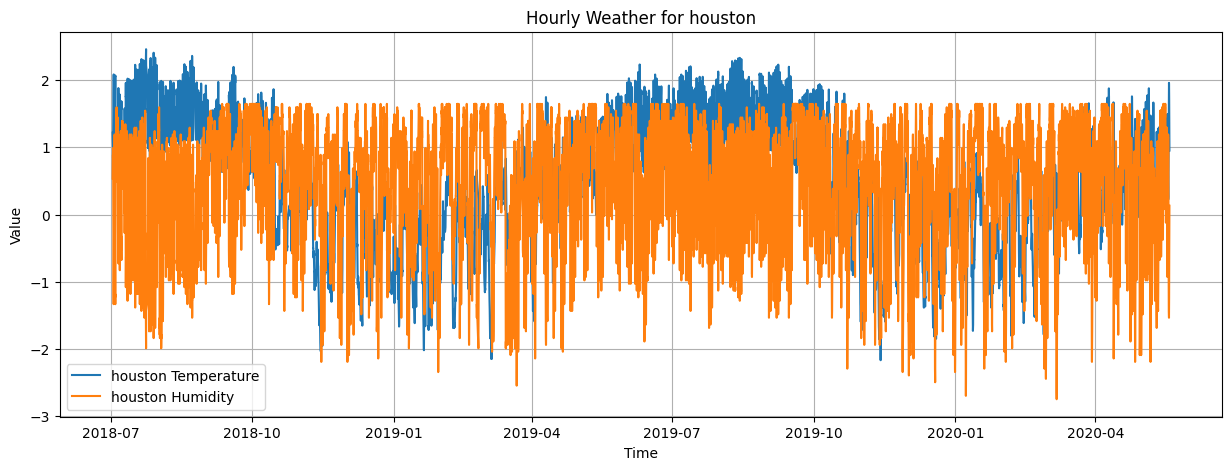

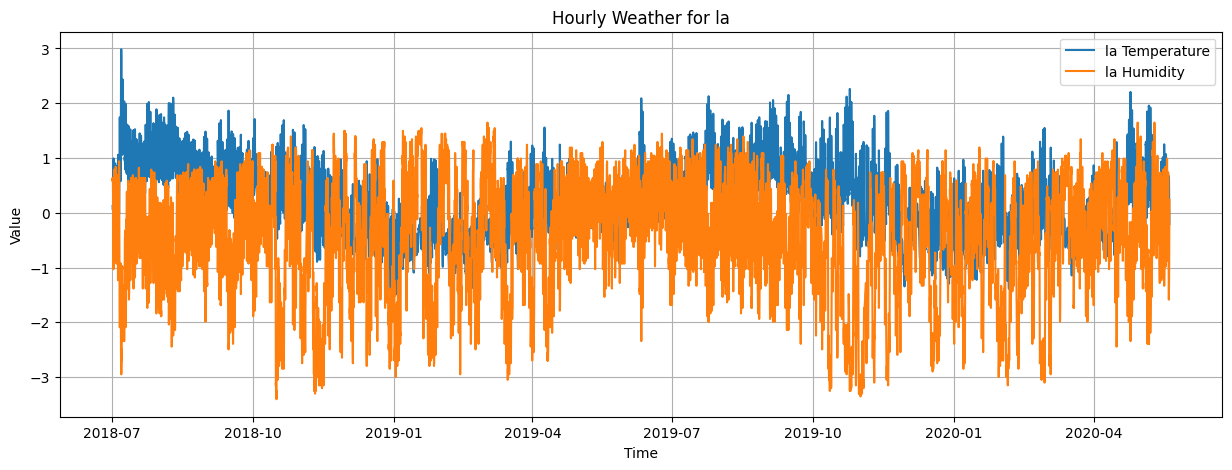

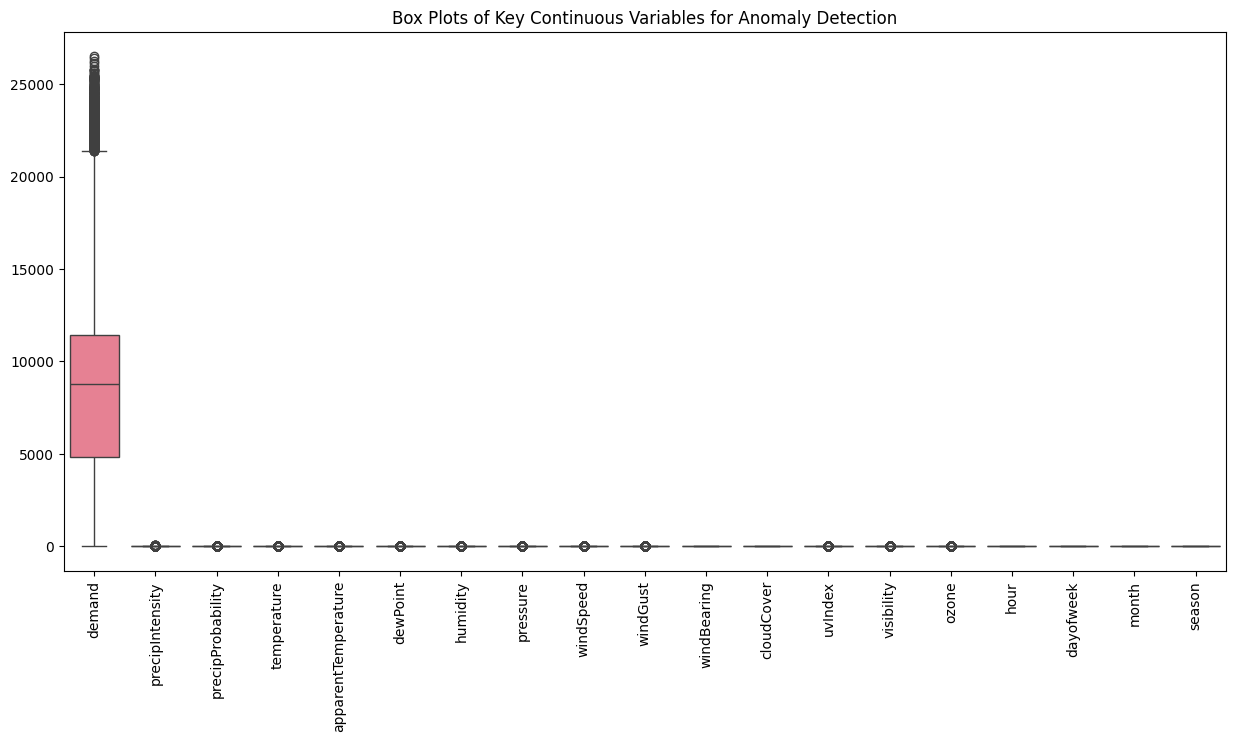


--- 5.2. Statistical Methods for Anomaly Detection ---

Total rows flagged as anomalous demand by Z-score method: 561
Sample of Z-score flagged demand anomaly indices:
[4558, 4559, 5052, 5053, 5458]
Sample of Z-score flagged demand anomalous records (first 5):
                    time    city    demand    season
4558 2019-01-02 18:00:00  dallas  19033.91 -1.289793
4559 2019-01-02 19:00:00  dallas  19166.89 -1.289793
5052 2019-01-23 08:00:00  dallas  19500.56 -1.289793
5053 2019-01-23 09:00:00  dallas  18946.17 -1.289793
5458 2019-02-08 07:00:00  dallas  19594.26 -1.289793

Total rows flagged as anomalous demand by IQR method: 1980
Sample of IQR flagged demand anomaly indices:
[1511, 1512, 1513, 1514, 1515]
Sample of IQR flagged demand anomalous records (first 5):
                    time    city    demand    season
1511 2018-09-01 14:00:00  dallas  20418.88  1.328863
1512 2018-09-01 15:00:00  dallas  21056.01  1.328863
1513 2018-09-01 16:00:00  dallas  21335.42  1.328863
1514 2018-09-

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import IsolationForest



# Before starting, ensure 'time' is still datetime for plotting, and sort for time-series operations
df['time'] = pd.to_datetime(df['time'])
df.sort_values(by=['city', 'time'], inplace=True)


continuous_cols_for_anomaly = [
    'demand', 
    'precipIntensity', 'precipProbability', 'temperature', 'apparentTemperature',
    'dewPoint', 'humidity', 'pressure', 'windSpeed', 'windGust', 'windBearing',
    'cloudCover', 'uvIndex', 'visibility', 'ozone',
    'hour', 'dayofweek', 'month', 'season'
]

# --- 5.1. Visual Inspection ---

print("--- 5.1. Visual Inspection for Anomalies ---")

# Plotting demand for a few cities to spot sudden spikes/drops
sample_cities = df['city'].unique()[:3] # Take first 3 cities

for city in sample_cities:
    city_df = df[df['city'] == city].set_index('time')
    plt.figure(figsize=(15, 5))
    plt.plot(city_df['demand'], label=f'{city} Demand')
    plt.title(f'Hourly Demand for {city}')
    plt.xlabel('Time')
    plt.ylabel('Demand')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting key weather variables for a city to check for impossible values
for city in sample_cities:
    city_df = df[df['city'] == city].set_index('time')
    plt.figure(figsize=(15, 5))
    plt.plot(city_df['temperature'], label=f'{city} Temperature')
    plt.plot(city_df['humidity'], label=f'{city} Humidity')
    plt.title(f'Hourly Weather for {city}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Check distributions of continuous variables (e.g., box plots for outliers)
plt.figure(figsize=(15, 7))
sns.boxplot(data=df[continuous_cols_for_anomaly])
plt.title('Box Plots of Key Continuous Variables for Anomaly Detection')
plt.xticks(rotation=90)
plt.show()

# --- 5.2. Statistical Methods for Anomaly Detection ---

print("\n--- 5.2. Statistical Methods for Anomaly Detection ---")

# Z-score Method for 'demand' (per city, per season)
threshold_z = 3 # Common threshold for Z-score
anomaly_indices_zscore_demand = pd.Index([]) # Initialize an empty index

for city in df['city'].unique():
    for season in df['season'].unique():
        subset_loc_indices = df.loc[(df['city'] == city) & (df['season'] == season)].index
        if not subset_loc_indices.empty:
            demand_series = df.loc[subset_loc_indices, 'demand']
            demand_mean = demand_series.mean()
            demand_std = demand_series.std()

            if demand_std > 0: # Avoid division by zero
                demand_zscore = (demand_series - demand_mean) / demand_std
                anomalies_in_subset = subset_loc_indices[demand_zscore.abs() > threshold_z]
                anomaly_indices_zscore_demand = anomaly_indices_zscore_demand.union(anomalies_in_subset)

print(f"\nTotal rows flagged as anomalous demand by Z-score method: {len(anomaly_indices_zscore_demand)}")
if not anomaly_indices_zscore_demand.empty:
    print("Sample of Z-score flagged demand anomaly indices:")
    print(anomaly_indices_zscore_demand[:5].tolist())
    print("Sample of Z-score flagged demand anomalous records (first 5):")
    print(df.loc[anomaly_indices_zscore_demand[:5]][['time', 'city', 'demand', 'season']])


# IQR Method for 'demand' (per city, per season)
anomaly_indices_iqr_demand = pd.Index([]) # Initialize an empty index

for city in df['city'].unique():
    for season in df['season'].unique():
        subset_loc_indices = df.loc[(df['city'] == city) & (df['season'] == season)].index
        if not subset_loc_indices.empty:
            demand_series = df.loc[subset_loc_indices, 'demand']
            Q1 = demand_series.quantile(0.25)
            Q3 = demand_series.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            anomalies_in_subset = subset_loc_indices[
                (demand_series < lower_bound) | (demand_series > upper_bound)
            ]
            anomaly_indices_iqr_demand = anomaly_indices_iqr_demand.union(anomalies_in_subset)

print(f"\nTotal rows flagged as anomalous demand by IQR method: {len(anomaly_indices_iqr_demand)}")
if not anomaly_indices_iqr_demand.empty:
    print("Sample of IQR flagged demand anomaly indices:")
    print(anomaly_indices_iqr_demand[:5].tolist())
    print("Sample of IQR flagged demand anomalous records (first 5):")
    print(df.loc[anomaly_indices_iqr_demand[:5]][['time', 'city', 'demand', 'season']])

# --- 5.3. Machine Learning Techniques (Isolation Forest) ---

print("\n--- 5.3. Machine Learning Techniques (Isolation Forest) ---")

anomaly_indices_isolation_forest = pd.Index([]) # Initialize an empty index

# Process per city for potentially better detection of city-specific anomalies
for city in df['city'].unique():
    # Use .loc for explicit indexing and avoid SettingWithCopyWarning
    city_data = df.loc[df['city'] == city].copy()

    # Check if the city_data has enough samples and features for Isolation Forest
    # Isolation Forest typically needs at least 2 samples, but more for meaningful results.
    # Also, ensure the features are present.
    if len(city_data) > 50 and all(col in city_data.columns for col in continuous_cols_for_anomaly):
        # Fit Isolation Forest
        # contamination: estimated proportion of outliers in the data. Adjust based on expected anomaly rate.
        model = IsolationForest(random_state=42, contamination=0.01, n_jobs=-1) # n_jobs=-1 uses all CPU cores

        # Fit_predict returns -1 for anomalies and 1 for normal observations
        anomaly_scores = model.fit_predict(city_data[continuous_cols_for_anomaly])

        # Get the indices of anomalous records for this city
        anomalous_indices_in_city = city_data.index[anomaly_scores == -1]
        anomaly_indices_isolation_forest = anomaly_indices_isolation_forest.union(anomalous_indices_in_city)
    else:
        print(f"Skipping Isolation Forest for {city}: Not enough data ({len(city_data)} rows) or missing features.")

print(f"\nTotal rows flagged as anomalous by Isolation Forest: {len(anomaly_indices_isolation_forest)}")
if not anomaly_indices_isolation_forest.empty:
    print("Sample of Isolation Forest flagged anomaly indices:")
    print(anomaly_indices_isolation_forest[:5].tolist())
    print("Sample of Isolation Forest flagged anomalous records (first 5):")
    print(df.loc[anomaly_indices_isolation_forest[:5]][['time', 'city', 'demand'] + list(continuous_cols_for_anomaly)]) # Show relevant columns



In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130656 entries, 0 to 150642
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   time                 130656 non-null  datetime64[ns]
 1   summary              130656 non-null  object        
 2   icon                 130656 non-null  object        
 3   precipIntensity      130656 non-null  float64       
 4   precipProbability    130656 non-null  float64       
 5   temperature          130656 non-null  float64       
 6   apparentTemperature  130656 non-null  float64       
 7   dewPoint             130656 non-null  float64       
 8   humidity             130656 non-null  float64       
 9   pressure             130656 non-null  float64       
 10  windSpeed            130656 non-null  float64       
 11  windGust             130656 non-null  float64       
 12  windBearing          130656 non-null  float64       
 13  cloudCover         

**CLUSTERING**

In [105]:
df.to_csv("cleaned_dataset.csv", index=False)
# df.head()

,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,...,precipType,ozone,city,demand,hour,dayofweek,month,season,date,week
0,2018-07-02 05:00:00,Clear,clear-night,-0.191771,-0.364451,1.721923,1.593148,0.905527,-1.131090,-0.740334,...,no_precipitation,0.043676,dallas,13839.70,-0.909811,-1.495212,0.126508,0.455977,2018-07-02,27
1,2018-07-02 06:00:00,Clear,clear-night,-0.191771,-0.364451,1.642721,1.624060,1.091609,-0.777512,-0.608854,...,no_precipitation,0.043676,dallas,14067.03,-0.766766,-1.495212,0.126508,0.455977,2018-07-02,27
2,2018-07-02 07:00:00,Clear,clear-night,-0.191771,-0.364451,1.557628,1.578536,1.152179,-0.575467,-0.592419,...,no_precipitation,0.043676,dallas,14323.09,-0.623722,-1.495212,0.126508,0.455977,2018-07-02,27
3,2018-07-02 08:00:00,Clear,clear-night,-0.191771,-0.364451,1.491517,1.525706,1.174035,-0.474445,-0.608854,...,no_precipitation,0.043676,dallas,14652.59,-0.480678,-1.495212,0.126508,0.455977,2018-07-02,27
4,2018-07-02 09:00:00,Clear,clear-night,-0.191771,-0.364451,1.410351,1.482430,1.240850,-0.221889,-0.575984,...,no_precipitation,0.043676,dallas,15582.09,-0.337634,-1.495212,0.126508,0.455977,2018-07-02,27


PCA

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [ ]:
# Encode categorical variables using one-hot encoding
categorical_cols = ['summary', 'icon', 'precipType', 'city']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Select numeric + encoded features
selected_features = ['temperature', 'humidity', 'windSpeed', 'hour', 'demand'] + \
    [col for col in df_encoded.columns if col not in ['time', 'date', 'week', 'temperature', 'humidity', 'windSpeed', 'hour', 'demand']]

# Standardize features
X = df_encoded[selected_features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



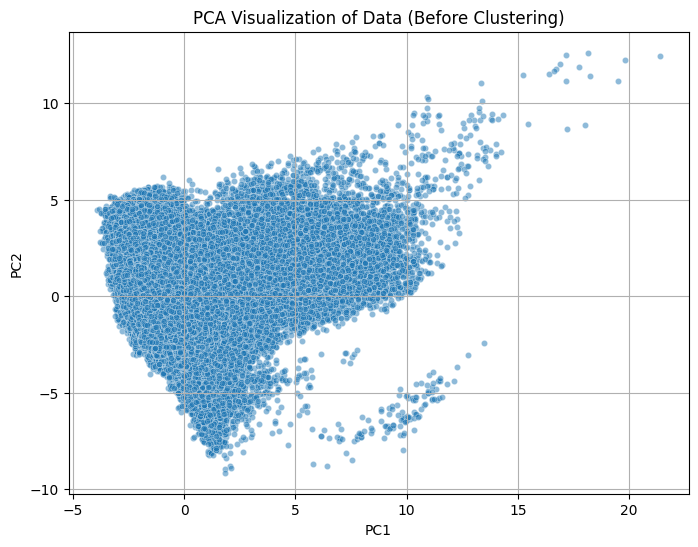

Explained variance ratio by PCA components: [0.06380674 0.058416  ]
Total explained variance by 2 components: 0.12


In [66]:
# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=df.index)

# Visualize PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.5, s=20)
plt.title('PCA Visualization of Data (Before Clustering)')
plt.grid(True)
plt.show()

# Print variance explained
print("Explained variance ratio by PCA components:", pca.explained_variance_ratio_)
print(f"Total explained variance by 2 components: {pca.explained_variance_ratio_.sum():.2f}")


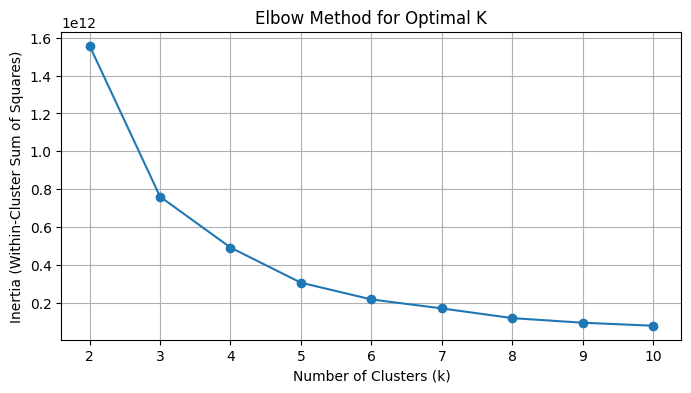

In [52]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
# Determine optimal k via the elbow method
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

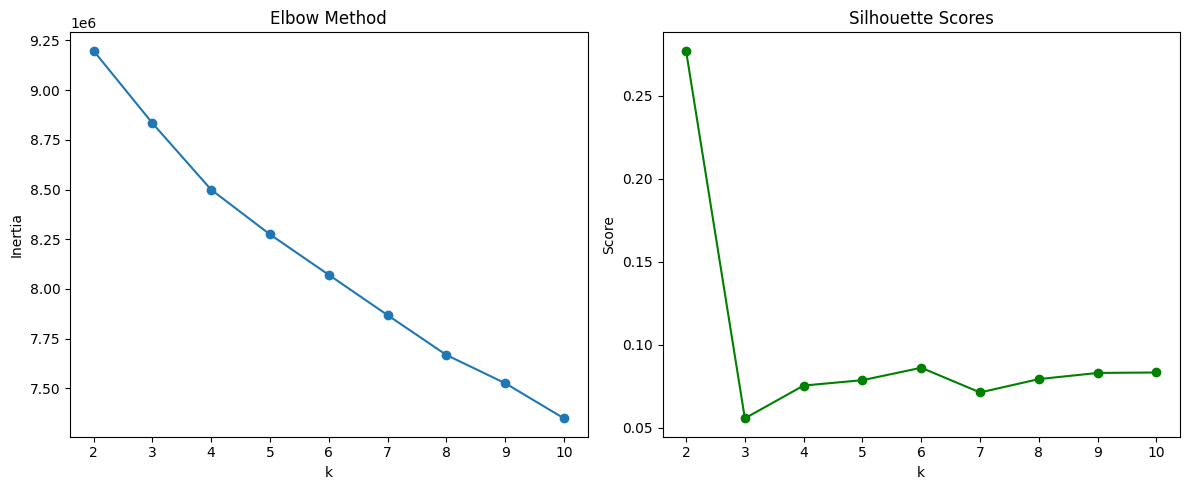

In [67]:
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow & Silhouette
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('k')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


In [69]:
# Fit KMeans with optimal k
optimal_k = 4  # Change based on Elbow/Silhouette result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_encoded['kmeans_cluster'] = kmeans.fit_predict(X_scaled)
pca_df['kmeans_cluster'] = df_encoded['kmeans_cluster']


DBSCAN

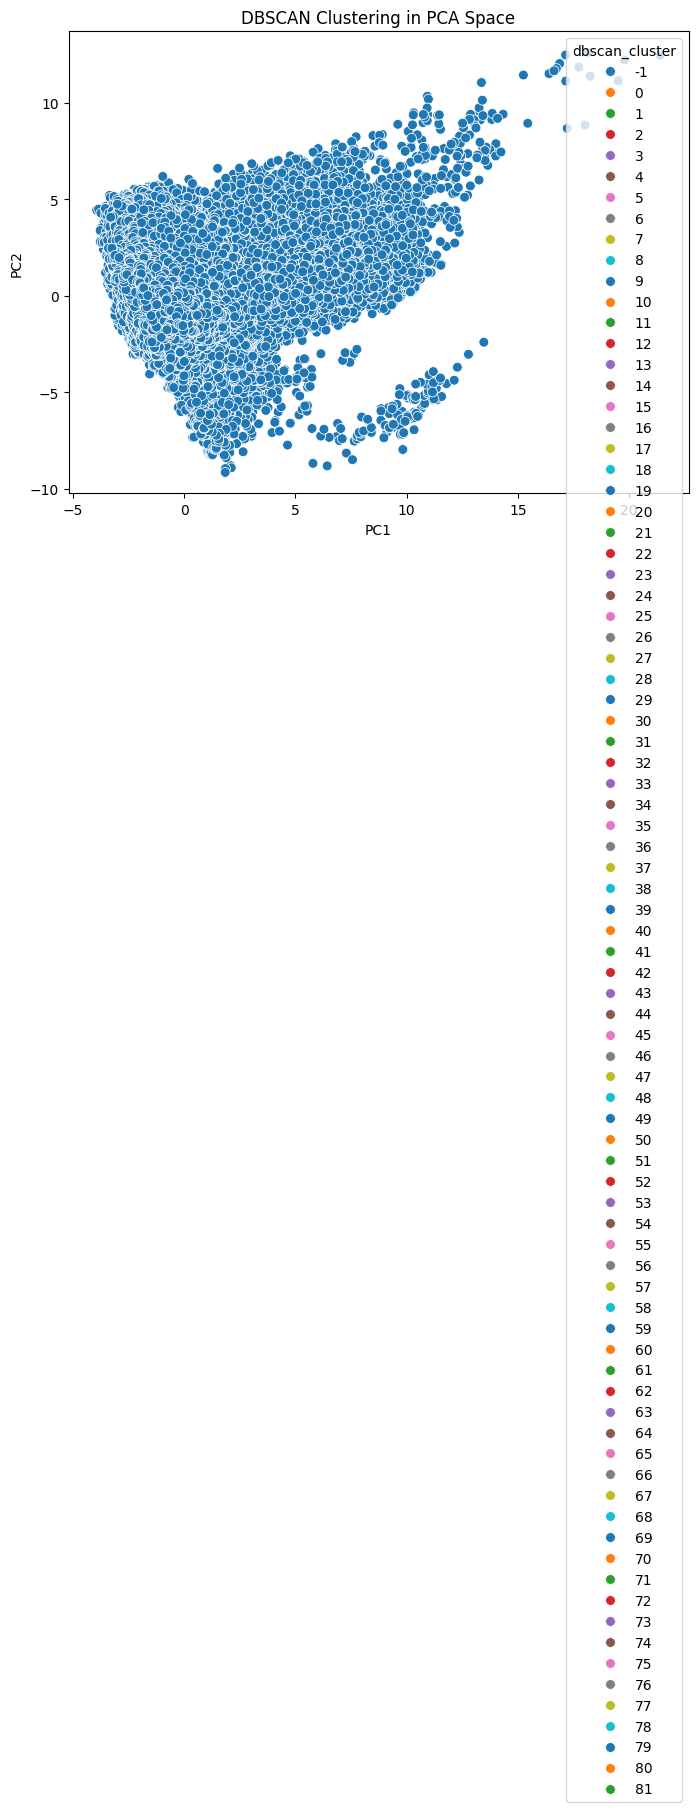

In [70]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
df_encoded['dbscan_cluster'] = dbscan.fit_predict(X_scaled)
pca_df['dbscan_cluster'] = df_encoded['dbscan_cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='dbscan_cluster', palette='tab10', s=50)
plt.title('DBSCAN Clustering in PCA Space')
plt.show()


DENDOGRAM

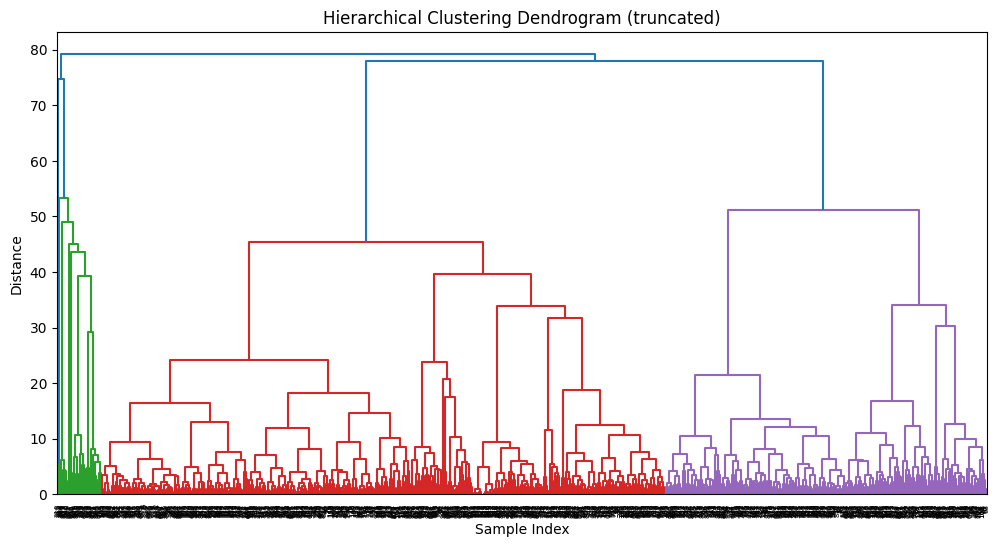

In [73]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import pandas as pd

# Assume X_scaled is your scaled feature matrix (NumPy array or DataFrame)
sample_size = 1000
X_sample = X_scaled[:sample_size]  # take first 1000 for hierarchical clustering

# Perform linkage
linked = linkage(X_sample, method='ward')

# Plot dendrogram (truncated)
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=20)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Assign clusters to the sample
sample_clusters = fcluster(linked, t=4, criterion='maxclust')

# Create a column in a new DataFrame for visualization
df_sample = df_encoded.iloc[:sample_size].copy()
df_sample['hierarchical_cluster'] = sample_clusters

# Update PCA data only for the sampled points
pca_sample = pca_df.iloc[:sample_size].copy()
pca_sample['hierarchical_cluster'] = sample_clusters


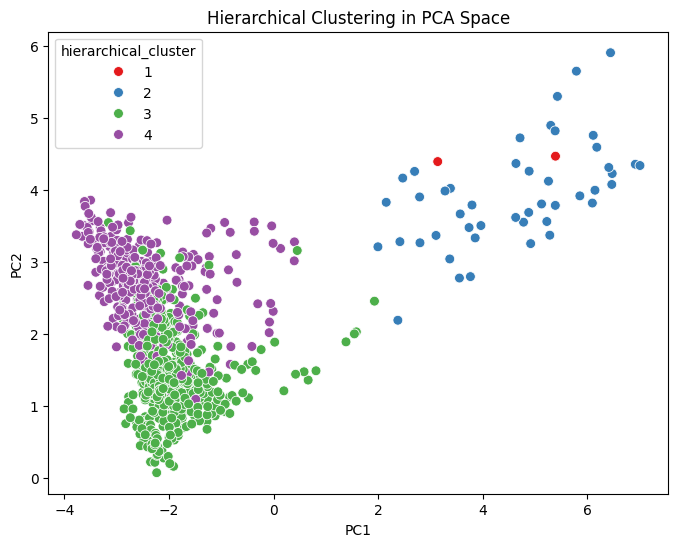

In [75]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_sample, x='PC1', y='PC2', hue='hierarchical_cluster', palette='Set1', s=50)
plt.title('Hierarchical Clustering in PCA Space')
plt.show()


In [77]:
final_silhouette = silhouette_score(X_scaled, df_encoded['kmeans_cluster'])
print(f"Final Silhouette Score for KMeans (k={optimal_k}): {final_silhouette:.4f}")


Final Silhouette Score for KMeans (k=4): 0.0755


In [78]:
cluster_summary = df_encoded.groupby('kmeans_cluster')[['temperature', 'humidity', 'windSpeed', 'hour', 'demand']].mean()
print("\nCluster Summary (KMeans):")
print(cluster_summary)
# Save the final DataFrame with clusters
# df_encoded.to_csv("final_dataset_with_clusters.csv", index=False)


Cluster Summary (KMeans):
                temperature  humidity  windSpeed      hour        demand
kmeans_cluster                                                          
0                 -0.395448  1.044944   0.480303  0.062353   7752.429813
1                 -0.289273  0.697194   0.183872  0.005023   7592.035912
2                  1.036283 -0.319315   0.240875  0.280083  11039.891721
3                 -0.546818 -0.086526  -0.258283 -0.188501   7181.482384


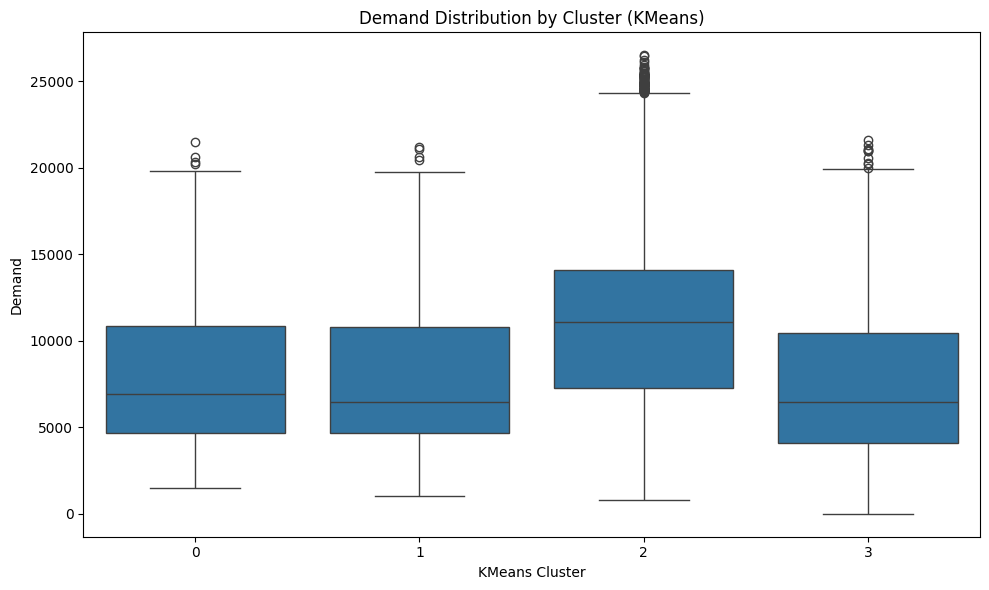

In [79]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='kmeans_cluster', y='demand', data=df_encoded)
plt.title('Demand Distribution by Cluster (KMeans)')
plt.xlabel('KMeans Cluster')
plt.ylabel('Demand')
plt.tight_layout()
plt.show()

Cluster Summary (KMeans):
                temperature  humidity  windSpeed      hour        demand  \
kmeans_cluster                                                             
0                 -0.395448  1.044944   0.480303  0.062353   7752.429813   
1                 -0.289273  0.697194   0.183872  0.005023   7592.035912   
2                  1.036283 -0.319315   0.240875  0.280083  11039.891721   
3                 -0.546818 -0.086526  -0.258283 -0.188501   7181.482384   

                precipIntensity  precipProbability  apparentTemperature  \
kmeans_cluster                                                            
0                      1.874794           3.310980            -0.389746   
1                     -0.087469          -0.022859            -0.290321   
2                     -0.110700          -0.260687             1.015575   
3                     -0.164415          -0.276853            -0.534133   

                dewPoint  pressure  ...  icon_wind  precipType_rai

C:\Users\ahsan\AppData\Local\Temp\ipykernel_14352\4141636218.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='kmeans_cluster', y='demand', data=df_encoded, palette='Set2')


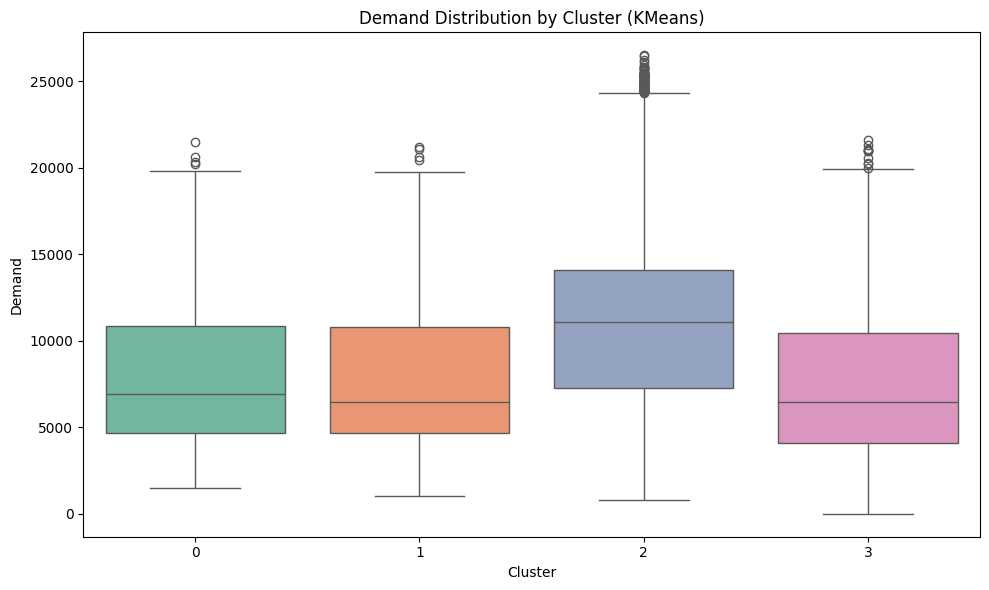

In [85]:
# Compute and print cluster-wise summary statistics
summary = df_encoded.groupby('kmeans_cluster')[selected_features].mean()
print("Cluster Summary (KMeans):")
print(summary)

# Visualize demand distribution per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='kmeans_cluster', y='demand', data=df_encoded, palette='Set2')
plt.title('Demand Distribution by Cluster (KMeans)')
plt.xlabel('Cluster')
plt.ylabel('Demand')
plt.tight_layout()
plt.show()
